In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

/home/lukas/.pyenv/versions/3.8.2/envs/evaluations/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
LABELS_PATH = 'test_labels.csv'
PRED_PROBA_PATH = 'test_pred_proba.csv'

## Load Data

In [4]:
print(f'loading labels from "{LABELS_PATH}"')
y_true = pd.read_csv(LABELS_PATH).label
print(y_true.shape)
y_true[:3]

loading labels from "test_labels.csv"
(450,)


0    0
1    6
2    2
Name: label, dtype: int64

In [5]:
print(f'loading pred_proba from "{PRED_PROBA_PATH}"')
y_pred_proba = pd.read_csv(PRED_PROBA_PATH)
print(y_pred_proba.shape)
y_pred_proba.head(3)

loading pred_proba from "test_pred_proba.csv"
(450, 10)


,pred_proba_0,pred_proba_1,pred_proba_2,pred_proba_3,pred_proba_4,pred_proba_5,pred_proba_6,pred_proba_7,pred_proba_8,pred_proba_9
0,9.999996e-01,1.784708e-14,1.401096e-12,3.774204e-16,1.112619e-12,3.031829e-11,3.435289e-07,5.591542e-13,4.401591e-10,1.770007e-08
1,4.093921e-06,2.396784e-06,1.487455e-09,1.010130e-13,5.600528e-06,7.150547e-11,9.999874e-01,4.974835e-13,5.436553e-07,1.189707e-17
2,4.811763e-15,6.504114e-09,1.000000e+00,5.030370e-09,5.994344e-17,3.267651e-09,1.023259e-11,3.378217e-17,4.093167e-09,2.216311e-13


In [6]:
y_pred = np.argmax(y_pred_proba.values, axis=1)
y_pred[:5]

array([0, 6, 2, 6, 6])

## Confusion Matrix

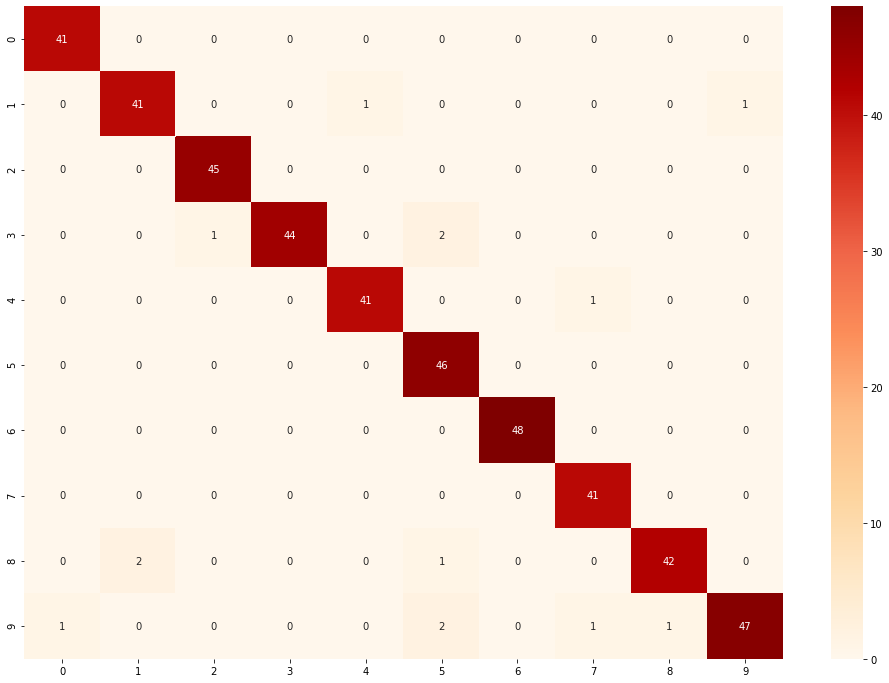

In [7]:
cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(17, 12))
sns.heatmap(cm, annot=True,cmap="OrRd")

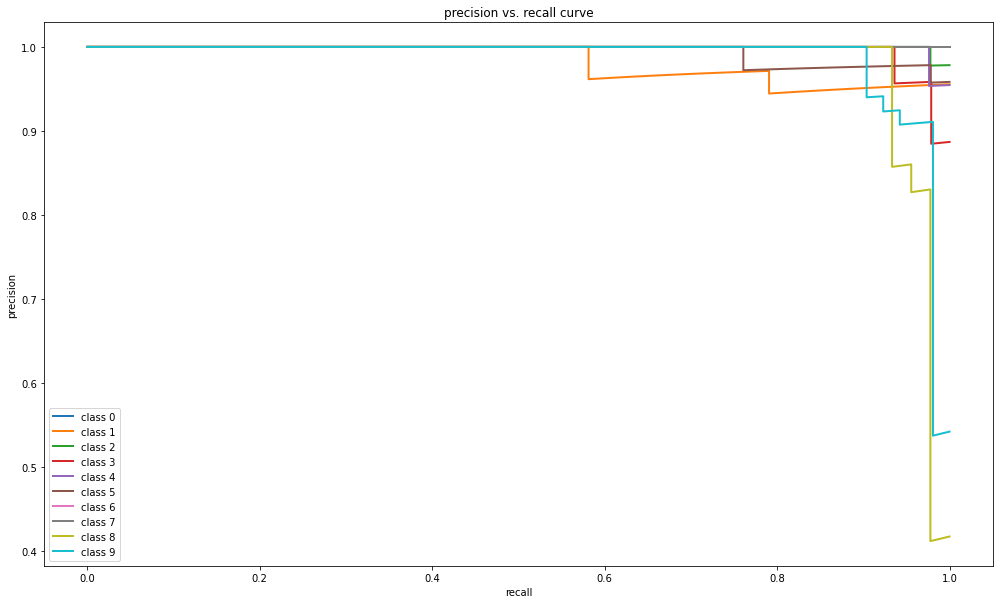

In [8]:
# precision recall curve
plt.figure(figsize=(17, 10))
precision = dict()
recall = dict()
n_classes = len(set(y_true))
for i in range(n_classes):
    precision[i], recall[i], _ = sklearn.metrics.precision_recall_curve(y_true == i, y_pred_proba.values[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()